<a href="https://colab.research.google.com/github/Yadav-Roshan/NLP_Assignment2/blob/main/21070126130_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><div>
<h1>Roshan Kumar Yadav</h1>
<h1>21070126130</h1>
<h2>AIML B3</h2>
</div>
</b>

# **Importing NLTK and Spacy Libraries**

In [1]:
# NLP
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
!pip install contractions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.4 MB/s eta 0:00:00


In [2]:
nltk.download("all")
!python -m spacy download en_core_web_sm

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

2023-09-02 08:59:40.806287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# **Importing Tensorflow Libraries**

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.utils import to_categorical

# **Importing Data Manipulation Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

 # **Getting Data From Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Reading CSV file
data = pd.read_csv("/content/drive/MyDrive/SEM 5/NLP/Assignment 1/WELFake_Dataset.csv")
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [8]:
# Removing Unwanted Columns
data.drop(['Unnamed: 0','text'], axis = 1, inplace = True)

# **Text Pre-processing**


In [9]:
len(data)

72134

In [10]:
data.dropna(inplace = True)
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [11]:
len(data)

62351

## **Text Cleaning**

In [12]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [13]:
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

In [14]:
#Remove Whitespace
def remove_whitespace(text):
  text = text.strip()
  return text

In [15]:
#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [16]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?>')
  text = html.sub(r'', text)
  return text

In [17]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r"", text)
  return text

In [18]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [19]:
#Convert Abbreviated Words
abbrev = pd.read_csv("/content/drive/MyDrive/SEM 5/NLP/LSTM Text Classification/abbrevations.csv",names=['SMF','FF'])
abbrev.head()

,SMF,FF
0,?,I have a question
1,?,I don’t understand what you mean
2,?4U,I have a question for you
3,;S,GeHmm? What did you say?
4,^^,read message


In [20]:
len(abbrev)

1549

In [21]:
# Applying all above functions
abbrev_lower = pd.DataFrame()
abbrev_lower['SMF'] = abbrev['SMF'].apply(text_lower)
abbrev_lower['FF'] = abbrev['FF'].apply(text_lower)
abbrev_dict = dict(zip(list(abbrev_lower.SMF), list(abbrev_lower.FF)))
abbrev_words = list(abbrev_dict.keys())

In [22]:
# Function to convert abbreviated into full forms
def convert_abbrev(text):
  words = []
  for word in regexp.tokenize(text):
    if word in abbrev_words:
      words = words + abbrev_dict[word].split()
    else:
      words = words + word.split()

  text_converted = " ".join(words)

  return text_converted

In [23]:
#Convert Contractions like you're
def convert_contractions(text):
  text = contractions.fix(text)
  return text

In [24]:
#Remove Stopwords
def remove_stopwords(text):
  text = " ".join([word for word in nltk.tokenize.word_tokenize(text) if word not in stopwords.words('english')])
  return text

In [25]:
#Lemmatization

nlp = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])

def lemmatize(text):
  text = " ".join([token.lemma_ for token in nlp(text)])
  return text

In [26]:
#Remove Non-Alphabetic Characters
def discard_non_alpha(text):
  word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
  text = " ".join(word_list_non_alpha)
  return text

In [27]:
#Aggregating All definitions
def text_clean(text):
  text = text_lower(text)
  text = remove_whitespace(text)
  text = re.sub('\n' , '', text)
  text = re.sub('\[.*?\]', '', text)
  text = remove_http_links(text)
  text = remove_punctuation(text)
  text = remove_html(text)
  text = remove_emoji(text)
  text = convert_abbrev(text)
  text = convert_contractions(text)
  text = remove_stopwords(text)
  text = discard_non_alpha(text)
  text = lemmatize(text)

  return text

In [28]:
# Apply on Dataset
data['title_Clean'] = data['title'].apply(text_clean)
data.head()

,title,label,title_Clean
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1,law enforcement high alert follow threat cop w...
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1,unbelievable obama attorney general say charlo...
2,"Bobby Jindal, raised Hindu, uses story of Chri...",0,bobby jindal raise hindu use story christian c...
3,SATAN 2: Russia unvelis an image of its terrif...,1,satan russia unvelis image terrify new supernu...
4,About Time! Christian Group Sues Amazon and SP...,1,time christian group sue amazon splc designati...


#Label Encoding

In [29]:
# No need to label encode as target is already in the form of 0 and 1.

# **Data Splitting**

In [30]:
# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(data.title_Clean, data.label, stratify=data.label,random_state=2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

<!-- #LSTM INPUT

**batch_size:** The number of sequences you feed into the model at once. It's a hyperparameter that you specify when training and represents the number of samples that are processed in parallel during each training iteration. For example, if your batch size is 32, then you'll process 32 sequences at a time.

**sequence_length:** The length of each input sequence. This value is determined by the padding you applied to make all sequences the same length. If your maximum sequence length is, for instance, 50 (meaning all sequences are padded/truncated to 50 tokens), then sequence_length would be 50.

**embedding_dim:** The dimensionality of the word embeddings used to represent each token in the sequence. This is the length of the dense vectors used to represent words. It's a hyperparameter that you set based on your problem and the size of your dataset. For instance, you might choose an embedding_dim of 100 or 300 -->

# **1st LSTM Model**

## **Processing Data for DL**

In [31]:
# Initializing hyperparameters for the LSTM Model
batch_size = 4
max_len = 50
embedding_dim = 50
max_words = 10000
lstm_units = 32

In [32]:
# Tokenizing texts and converting into Tensorflow sequences in the form of matrix
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [33]:
seq_matrix[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  876, 1902, 5658,  822,  427, 1790,  241,
        354,  146,  145,  181, 2018, 1255], dtype=int32)

In [34]:
# First LSTM Model
def LSTM_Model(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [35]:
model = LSTM_Model(max_words, max_len, embedding_dim, lstm_units, 2)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            500000    
                                                                 
 lstm (LSTM)                 (None, 32)                10624     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 510,690
Trainable params: 510,690
Non-trainable params: 0
_________________________________________________________________


## **Model Training**

In [38]:
model.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
9353/9353 [==============================] - 790s 84ms/step - loss: 0.1132 - accuracy: 0.9553 - val_loss: 0.2971 - val_accuracy: 0.8967
Epoch 2/3
9353/9353 [==============================] - 763s 82ms/step - loss: 0.0844 - accuracy: 0.9675 - val_loss: 0.3361 - val_accuracy: 0.8905
Epoch 3/3
9353/9353 [==============================] - 759s 81ms/step - loss: 0.0626 - accuracy: 0.9766 - val_loss: 0.3939 - val_accuracy: 0.8909


## **Test Model**

In [39]:
prediction = model.predict(test_seq_matrix)

488/488 [==============================] - 5s 10ms/step


In [40]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction, axis = 1)))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      8602
         1.0       0.87      0.88      0.87      6986

    accuracy                           0.89     15588
   macro avg       0.88      0.88      0.88     15588
weighted avg       0.89      0.89      0.89     15588



<Axes: title={'center': 'Confusion Matrix for First LSTM Model'}>

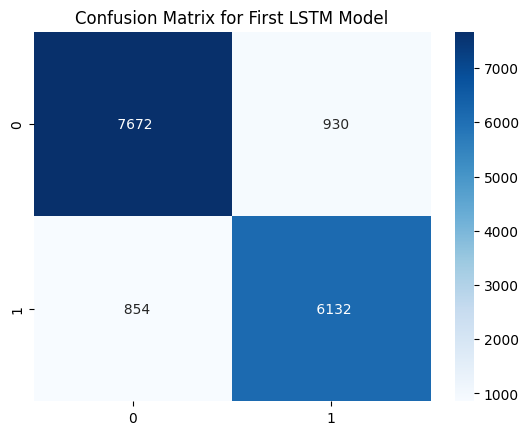

In [41]:
# Confusion Matrix
plt.title("Confusion Matrix for First LSTM Model")
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction, axis = 1)), annot=True,fmt='5',cmap='Blues')

# **2nd LSTM Model**

In [42]:
# Hyperparameters
batch_size = 8
max_len = 30
embedding_dim = 30
max_words = 25000
lstm_units = 64

In [43]:
# Tokenizing and creating Tensorflow Sequence Matrix
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
seqs = tok.texts_to_sequences(X_train)
test_seqs = tok.texts_to_sequences(X_test)
seq_matrix = sequence.pad_sequences(seqs,max_len)
test_seq_matrix = sequence.pad_sequences(test_seqs,max_len)

In [44]:
# LSTM Model
def LSTM_Model_2(words,len,dim,units,num_labels):
  model = tf.keras.Sequential()
  model.add(Embedding(input_dim=words, output_dim=dim, input_length=len))
  model.add(LSTM(units=units, dropout=0.2, recurrent_dropout=0.2, return_sequences = True))
  model.add(LSTM(units=int(units/2), dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_labels, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [45]:
model_2 = LSTM_Model_2(max_words, max_len, embedding_dim, lstm_units, 2)

In [46]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 30)            750000    
                                                                 
 lstm_1 (LSTM)               (None, 30, 64)            24320     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 786,802
Trainable params: 786,802
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Training LSTM model
model_2.fit(seq_matrix,y_train,epochs=3,batch_size=batch_size,validation_split=0.2)

Epoch 1/3
4677/4677 [==============================] - 537s 113ms/step - loss: 0.3032 - accuracy: 0.8688 - val_loss: 0.2425 - val_accuracy: 0.8987
Epoch 2/3
4677/4677 [==============================] - 518s 111ms/step - loss: 0.1948 - accuracy: 0.9211 - val_loss: 0.2367 - val_accuracy: 0.9017
Epoch 3/3
4677/4677 [==============================] - 521s 111ms/step - loss: 0.1454 - accuracy: 0.9435 - val_loss: 0.2878 - val_accuracy: 0.8936


In [48]:
prediction = model_2.predict(test_seq_matrix)

488/488 [==============================] - 9s 18ms/step


In [49]:
# Classification Report
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,np.argmax(prediction, axis = 1)))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      8602
         1.0       0.88      0.88      0.88      6986

    accuracy                           0.89     15588
   macro avg       0.89      0.89      0.89     15588
weighted avg       0.89      0.89      0.89     15588



<Axes: title={'center': 'Confusion Matrix for Second LSTM Model'}>

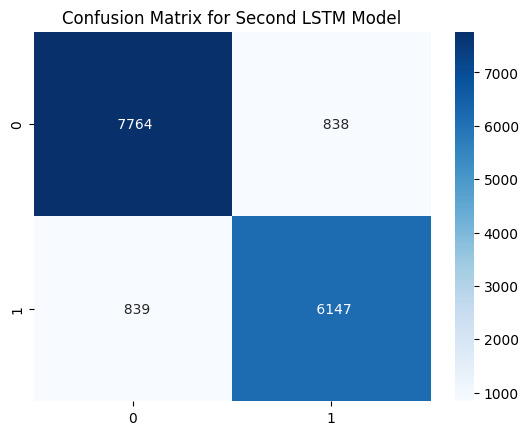

In [50]:
# Confusion Matrix
plt.title("Confusion Matrix for Second LSTM Model")
sns.heatmap(confusion_matrix(y_test,np.argmax(prediction, axis = 1)), annot=True,fmt='5',cmap='Blues')

# **Final Comparison**

<p>It's very clear from confusion matrix, second double LSTM layered model is better than the first model with a single LSTM layer.<p>

<p>
  Both models were trained for 10 epochs but after 3rd epochs validation accuracy started dropping down. So, both were trained only upto 3 epochs.
</p>